Diabeties Prediction Analysis


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46768 entries, 0 to 46767
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       46768 non-null  float64
 1   HighBP                46768 non-null  float64
 2   HighChol              46768 non-null  float64
 3   CholCheck             46768 non-null  float64
 4   BMI                   46768 non-null  float64
 5   Smoker                46768 non-null  float64
 6   Stroke                46768 non-null  float64
 7   HeartDiseaseorAttack  46768 non-null  float64
 8   PhysActivity          46768 non-null  float64
 9   Fruits                46768 non-null  float64
 10  Veggies               46768 non-null  float64
 11  HvyAlcoholConsump     46768 non-null  float64
 12  AnyHealthcare         46768 non-null  float64
 13  NoDocbcCost           46768 non-null  float64
 14  GenHlth               46768 non-null  float64
 15  MentHlth           

Descriptive Analysis

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,...,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,46768.000000,46767.000000,46767.000000,46767.000000
mean,0.244227,0.467178,0.452446,0.965917,28.790498,0.451591,0.046912,0.109776,0.742645,0.625898,...,0.951420,0.088180,2.602185,3.363389,4.698640,0.191605,0.445091,8.181346,5.018175,5.967734
std,0.429632,0.498927,0.497739,0.181445,6.886169,0.497656,0.211454,0.312614,0.437182,0.483895,...,0.214991,0.283559,1.093132,7.660326,9.160767,0.393568,0.496981,3.004960,1.002313,2.104324
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: ylabel='Frequency'>

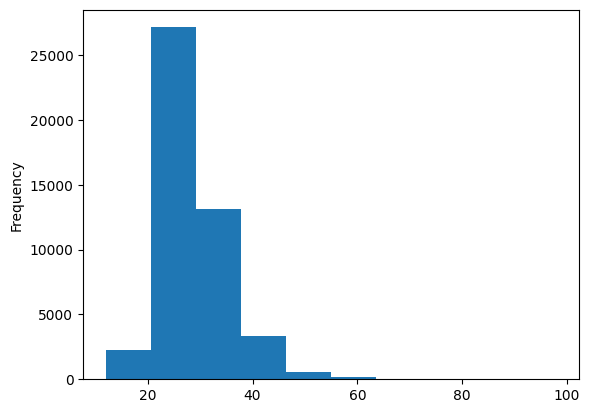

In [ ]:
df['BMI'].plot(kind= 'hist')

<Axes: ylabel='Frequency'>

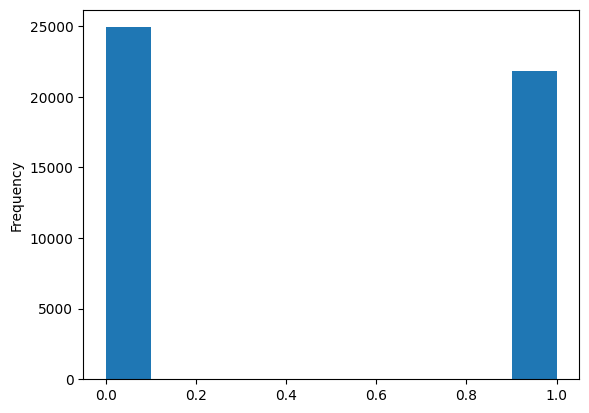

In [ ]:
df['HighBP'].plot(kind= 'hist')

<Axes: title={'center': 'Correlation with DiabetesPrediction'}>

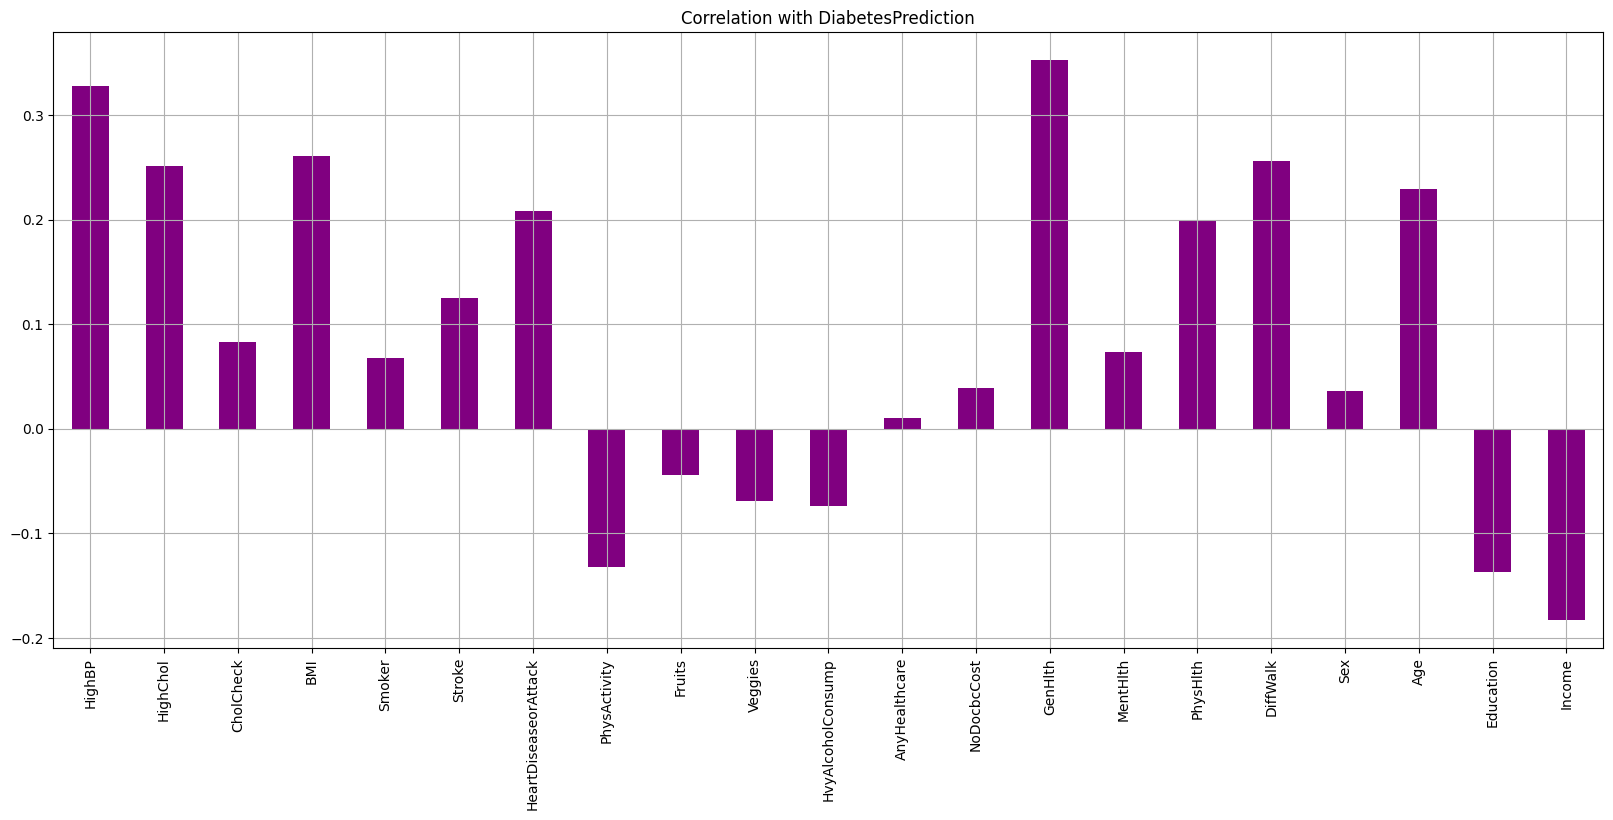

In [ ]:
df.drop('Diabetes_binary',axis=1).corrwith(df.Diabetes_binary).plot(kind='bar',grid=True, figsize=(20,8),title="Correlation with DiabetesPrediction",color='Purple')

Diabetes Prediction

In [ ]:
#define features(X)and target variable (y)
X = df[['BMI','HighBP']]
y = df['Diabetes_binary']

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#build a logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#make prediction on test set
y_pred = model.predict(X_test)

#evaluate model
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Classifiction Report :\n{classification_rep}")

Accuracy:0.7630960017104982
Confusion Matrix:
 [[6801  249]
 [1967  337]]
Classifiction Report :
              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      7050
         1.0       0.58      0.15      0.23      2304

    accuracy                           0.76      9354
   macro avg       0.68      0.56      0.55      9354
weighted avg       0.73      0.76      0.71      9354



prescriptive of diabetes prediction

In [ ]:
#now take user input for new data
new_bmi = float(input("Enter BMI value "))
new_high_bp = float(input("Enter 1 if High Blood Pressure or 0 if not:"))

#make prediction for new data
new_data = scaler.transform([[new_bmi, new_high_bp]])

#display prediction and advice
prediction = model.predict(new_data)
if prediction[0] == 1:
  print("The model predicts that the person is diabetic. It is advisable not to eat sugar and exercise daily. ")
else:
  print("The model predicts that the person is not diabetic. But the person should take steps towards healthy lifestyle. ")


Enter BMI value 26
Enter 1 if High Blood Pressure or 0 if not:1
The model predicts that the person is not diabetic. But the person should take steps towards healthy lifestyle. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SMOKING PREDICTION


In [ ]:
#define features (X)and target variable(y)
X = df[['Stroke','HeartDiseaseorAttack']]
y = df['Smoker']


In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#bulid a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#make prediction on test set
y_pred = model.predict(X_test)

#evalute model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy:0.579003634808638
Confusion Matrix:
[[4637  474]
 [3464  779]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.91      0.70      5111
         1.0       0.62      0.18      0.28      4243

    accuracy                           0.58      9354
   macro avg       0.60      0.55      0.49      9354
weighted avg       0.59      0.58      0.51      9354



prescriptive of smoking

In [ ]:
#now take user input for new data
new_stroke = float(input("Stroke; if yes 1,no 0:"))
new_heartdis = float(input("Enter 1 if Heart disease or 0 if not:"))

#make prediction for new data
new_data = scaler.transform([[new_stroke, new_heartdis]])

#display prediction and advice
prediction = model.predict(new_data)
if prediction[0] == 1:
  print("The model predicts that the person is a smoker. Try to reduce smoking and seek support if required. ")
else:
  print("The model predicts that the person is non smoker. Try to have a healthy diet and regular checkups for precaution. ")

Stroke; if yes 1,no 0:1
Enter 1 if Heart disease or 0 if not:1
The model predicts that the person is a smoker. Try to reduce smoking and seek support if required. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


High Cholestrol Prediction

In [ ]:
X = df[['Stroke','HvyAlcoholConsump']]
y = df['HighChol']

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#bulid a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#make prediction on test set
y_pred = model.predict(X_test)

#evalute model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy:0.5676715843489416
Confusion Matrix:
[[5024  138]
 [3906  286]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.97      0.71      5162
         1.0       0.67      0.07      0.12      4192

    accuracy                           0.57      9354
   macro avg       0.62      0.52      0.42      9354
weighted avg       0.61      0.57      0.45      9354



Prescriptive of High Cholestrol

In [ ]:
#now take user input for new data
new_stroke = float(input("Stroke; if yes 1,no 0:"))
new_HvyAlcoholConsump = float(input("Enter 1 if Alcohol Consumption is true or 0 if not:"))

#make prediction for new data
new_data = scaler.transform([[new_stroke, new_HvyAlcoholConsump]])

#display prediction and advice
prediction = model.predict(new_data)
if prediction[0] == 1:
  print("The model predicts that the person has high cholestrol. Advised to have a healthy diet and regular exercise ")
else:
  print("The model predicts that the person does not have high cholestrol . Should have healthy diet and manage stress. ")

Stroke; if yes 1,no 0:1
Enter 1 if Alcohol Consumption is true or 0 if not:0
The model predicts that the person has high cholestrol. Advised to have a healthy diet and regular exercise 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
